# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. 
Disclaimer: This project is just meant to practice visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) to present day Feb 2021.

## Get the Data

In this section we will use pandas to directly read data from Google finance using pandas!

In [97]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [98]:
BAC = data.DataReader('BAC', 'stooq', 'Jan 1 2006')
C = data.DataReader('C', 'stooq', 'Jan 1 2006')
GS = data.DataReader('GS', 'stooq', 'Jan 1 2006')
JPM = data.DataReader('JPM', 'stooq', 'Jan 1 2006')
MS = data.DataReader('MS', 'stooq', 'Jan 1 2006')
WFC = data.DataReader('WFC', 'stooq', 'Jan 1 2006')

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [99]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [100]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], keys = tickers, axis=1)
bank_stocks.tail()

BAC                                         C                 \
             Open   High      Low  Close      Volume   Open   High     Low   
Date                                                                         
2021-01-26  31.40  31.43  30.9100  30.94  36373036.0  61.20  61.24  60.087   
2021-01-27  30.31  30.43  29.6700  29.83  63809175.0  59.90  60.00  58.530   
2021-01-28  30.42  30.75  29.9174  30.32  51223276.0  60.15  61.06  59.630   
2021-01-29  30.40  30.50  29.5900  29.65  64019079.0  59.96  60.20  57.690   
2021-02-01  29.87  30.04  29.5700  29.96  40985251.0  58.66  58.67  57.400   

                               ...     MS                                     \
            Close      Volume  ...   Open   High      Low  Close      Volume   
Date                           ...                                             
2021-01-26  60.91  18760885.0  ...  72.74  73.32  71.1400  71.21  10899728.0   
2021-01-27  59.40  24657198.0  ...  69.73  70.26  67.8500  68.42  17002601.0   
2021-01-28  60.34  19986196.0  ...  69.44  70.77  68.6500  69.32  14986197.0   
2021-01-29  57.99  27078339.0  ...  69.01  70.06  66.8450  67.05  17566053.0   
2021-02-01  58.43  16073001.0  ...  67.88  68.12  67.2701  67.67  11961557.0   

               WFC                                   
              Open   High    Low  Close      Volume  
Date                                                 
2021-01-26  32.490  32.53  31.36  31.38  28026455.0  
2021-01-27  30.920  31.03  29.92  30.17  45074947.0  
2021-01-28  30.525  31.05  30.31  30.81  28770175.0  
2021-01-29  30.770  31.19  29.82  29.88  39500819.0  
2021-02-01  30.140  30.22  29.68  29.99  23713446.0  

[5 rows x 30 columns]

** Set the column name levels.**

In [101]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [102]:
bank_stocks.head()

Bank Ticker     BAC                                           C          \
Stock Info     Open    High     Low   Close      Volume    Open    High   
Date                                                                      
2006-01-03   41.185  41.410  40.508  41.324  18565928.0  434.68  438.02   
2006-01-04   41.255  41.468  40.772  40.886  20230721.0  433.45  435.56   
2006-01-05   40.886  41.106  40.659  40.939  16887242.0  429.69  432.71   
2006-01-06   41.078  41.175  40.686  40.877  14348537.0  433.61  433.77   
2006-01-09   41.009  41.229  40.693  40.904  17794318.0  431.11  432.35   

Bank Ticker                             ...      MS                          \
Stock Info      Low   Close     Volume  ...    Open    High     Low   Close   
Date                                    ...                                   
2006-01-03   426.76  437.25  1733359.0  ...  39.739  40.653  39.435  40.527   
2006-01-04   428.88  429.16  2109140.0  ...  40.804  41.205  40.559  40.559   
2006-01-05   429.34  431.27  1279794.0  ...  40.559  40.726  40.323  40.670   
2006-01-06   427.57  431.27  1544654.0  ...  40.851  40.902  40.350  40.710   
2006-01-09   428.44  429.25  1894722.0  ...  40.749  41.213  40.741  41.136   

Bank Ticker                WFC                                      
Stock Info      Volume    Open    High     Low   Close      Volume  
Date                                                                
2006-01-03   6421817.0  23.594  23.876  23.296  23.818  14754974.0  
2006-01-04   9527984.0  23.740  23.755  23.413  23.541  14558894.0  
2006-01-05   6900739.0  23.518  23.556  23.375  23.518  13569368.0  
2006-01-06   8228569.0  23.581  23.720  23.437  23.651  11255751.0  
2006-01-09   4949824.0  23.651  23.755  23.556  23.651   7526696.0  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit!

** What is the max Close price for each bank's stock throughout the time period?**

In [103]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     48.187
C      500.400
GS     307.870
JPM    141.170
MS      76.470
WFC     59.206
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [104]:
returns = pd.DataFrame()
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

In [105]:
returns.tail()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2021-01-26   -0.007060  0.005779  -0.004522   -0.004087  -0.016165   -0.026675
2021-01-27   -0.035876 -0.024791  -0.029919   -0.028272  -0.039180   -0.038560
2021-01-28    0.016426  0.015825   0.006183    0.017597   0.013154    0.021213
2021-01-29   -0.022098 -0.038946  -0.013999   -0.011068  -0.032747   -0.030185
2021-02-01    0.010455  0.007588   0.013128    0.007383   0.009247    0.003681

** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

In [106]:
import seaborn as sns
sns.set_theme(context='notebook', style='whitegrid', palette='viridis')

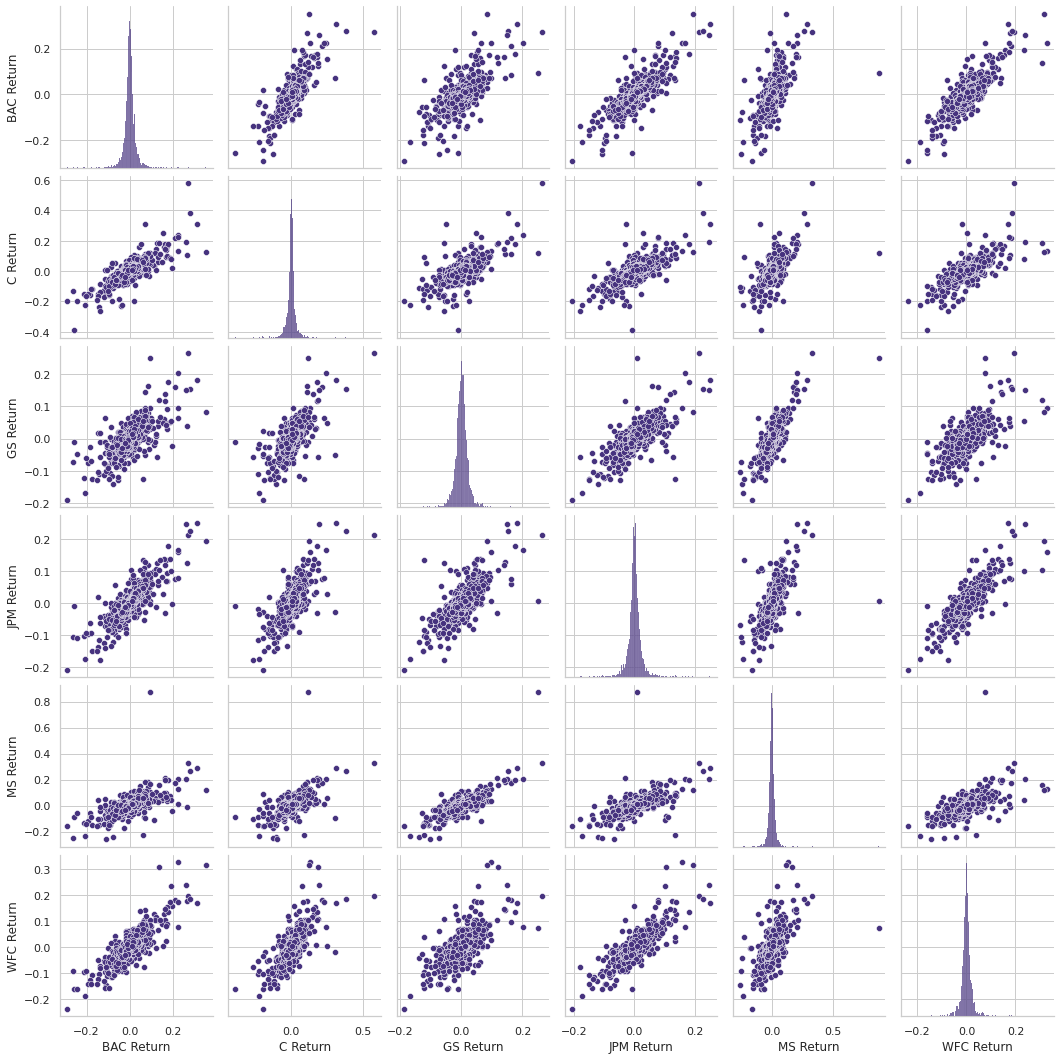

In [107]:
sns.pairplot(data = returns)

I found that the data for Citibank did not match the course series pairplot and the explaination for this on the Q&A was that it was probably affected by a stock split between the course compilation and now. Solution: use the pickle file with the data that was provided with the course, frozen in time.
Why this is unsatisfying to me: I don't understand, nor can I accept, how a stock split or any event for that matter would affect data from the past that was already recorded and I don't like the thought of past data being changed or manipulated. For now I will proceed with theassignment without worrying too much about why the data doesn't match, and finding extra correlations and visualizations that are of interest to me.

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [108]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [109]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

Citibank does look like the most volatile of all the banks judging by it's std overall

In [110]:
returns.std()

BAC Return    0.032416
C Return      0.034315
GS Return     0.023707
JPM Return    0.025138
MS Return     0.033241
WFC Return    0.027517
dtype: float64

In [111]:
returns.loc['2015-01-01':'2016-01-01'].std()

BAC Return    0.016148
C Return      0.015279
GS Return     0.014026
JPM Return    0.013964
MS Return     0.016008
WFC Return    0.012549
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

In [112]:
import matplotlib.pyplot as plt

<Figure size 864x432 with 0 Axes>

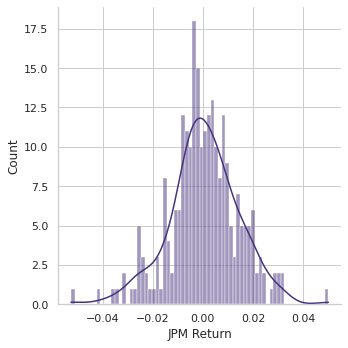

In [113]:
plt.figure(figsize=(12,6))
sns.displot(returns.loc['2015-01-01':'2016-01-01']['JPM Return'], kind='hist', kde=True, bins = 70)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

<Figure size 720x432 with 0 Axes>

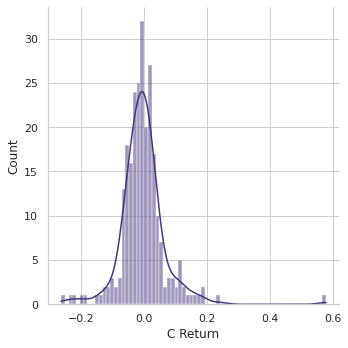

In [114]:
plt.figure(figsize=(10,6))
sns.displot(data=returns.loc['2008-01-01':'2009-01-01']['C Return'], kind='hist', kde=True, bins=70)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()
init_notebook_mode(connected=True)

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [116]:
close = bank_stocks.xs(key='Close', axis=1, level='Stock Info')
close.iplot(kind='scatter', mode='lines+markers', size = .5, width = .5)

The above is one I made with plotly and so it's interactive in that you can see the values you hover over with the curseer. But it takes a lot of computing power and makes everything lag, so I'm going to continue with seaborn.

<AxesSubplot:xlabel='Date'>

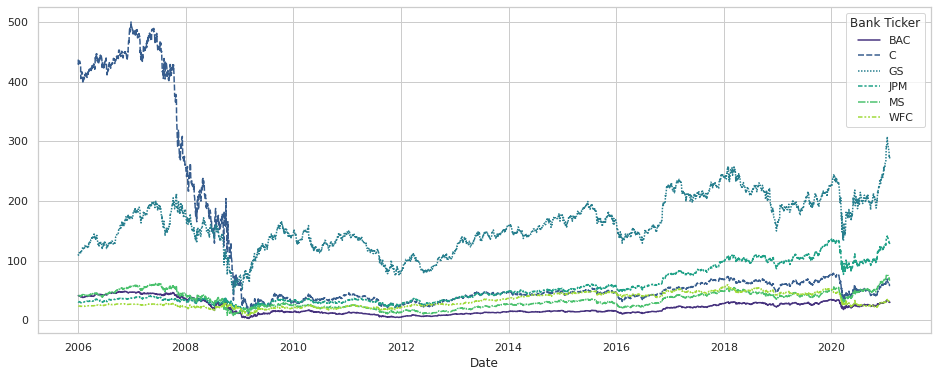

In [117]:
plt.figure(figsize=(16,6))
sns.lineplot(data = bank_stocks.xs(key='Close', axis=1, level='Stock Info'), markers=False)

In [118]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

<AxesSubplot:xlabel='Date', ylabel='Close'>

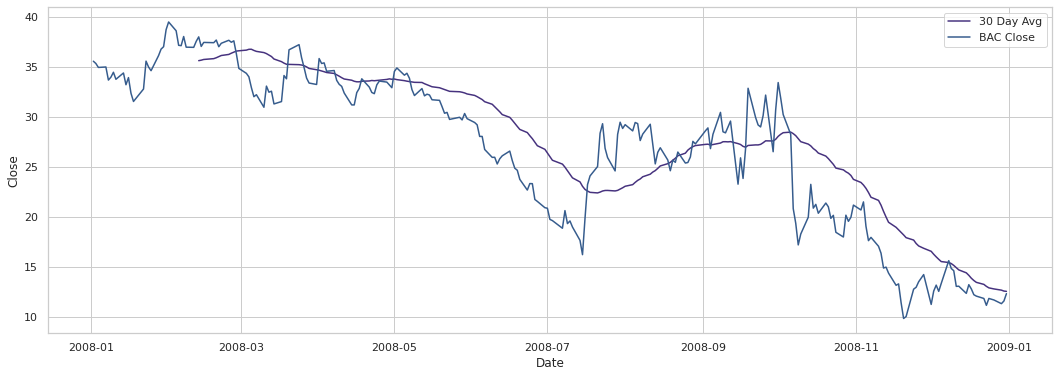

In [119]:
plt.figure(figsize=(18,6))
sns.lineplot(data=bank_stocks['BAC'].loc['2008-01-01':'2009-01-01']['Close'].rolling(30).mean(), label='30 Day Avg')
sns.lineplot(data=bank_stocks['BAC'].loc['2008-01-01':'2009-01-01']['Close'], label='BAC Close')

** Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

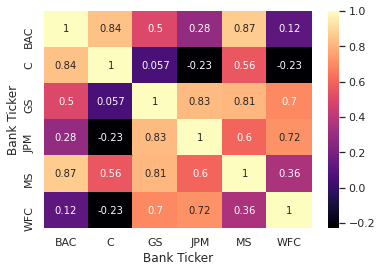

In [120]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), cmap='magma', annot=True)

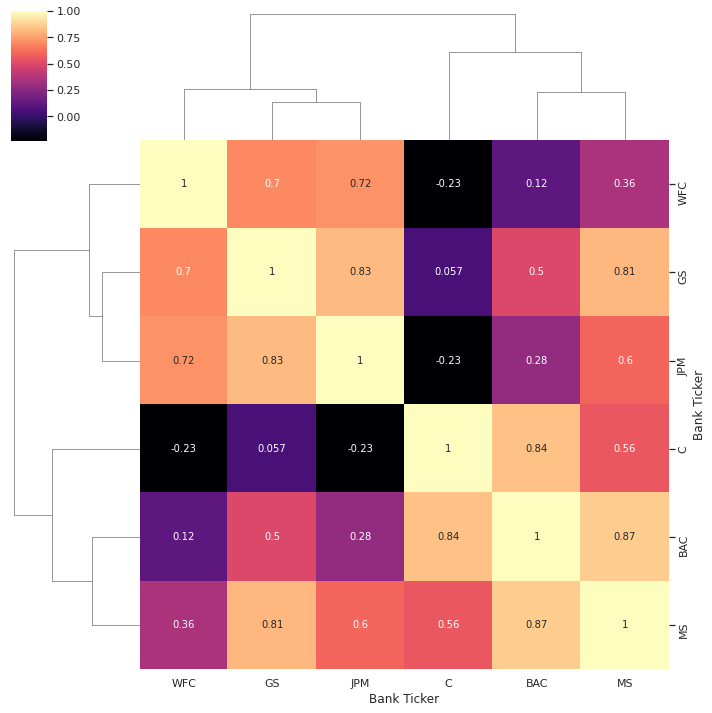

In [121]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), cmap='magma', annot=True)

# Part 2

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [122]:
close_corr=bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()
close_corr.iplot(kind='heatmap', colorscale='rdylbu')

In [123]:
bank_stocks['BAC'].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [124]:
bank_stocks['MS'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [125]:
bank_stocks['BAC'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

Lots of fascinating methods to explore and a great dataset to explore them with! As zi am into stocks I will definitely be using these methods in the future. Something wild is going on with GME at the moment so might be worth a similar analysis in the near future.